In [1]:
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import hw1_class as cs
import readfile 
import time
import matplotlib.pyplot as plt

In [3]:
# readfile
documents = readfile.read_json_files('attachments')

In [4]:
# parameters
k = 10
num_permutations = 100
num_bands = 20
rows_per_band = 5
similarity_threshold = 0.1

In [5]:
# shingling and generate vocabulary
shingler = cs.Shingling(k)
shingles_list = [shingler.shingle(doc) for doc in documents]
vocas = shingler.vocas_from_documents(*documents)

In [6]:
j_similarity = list()
for i in range(len(shingles_list)):
    for j in range (i + 1, len(shingles_list)): 
        similarity = cs.CompareSets.jaccard_similarity(set(shingles_list[i]), set(shingles_list[j]))
        if similarity >= similarity_threshold:
                print(f"Documents {i+1} and {j+1} are similar with Jaccard similarity {similarity}")
        if j == 12:
            j_similarity.append(similarity)

Documents 10 and 11 are similar with Jaccard similarity 0.7877059569074778
Documents 10 and 12 are similar with Jaccard similarity 0.970661672908864
Documents 10 and 13 are similar with Jaccard similarity 0.7964244521337946
Documents 11 and 12 are similar with Jaccard similarity 0.7703889585947302
Documents 11 and 13 are similar with Jaccard similarity 0.6518122400475341
Documents 12 and 13 are similar with Jaccard similarity 0.7724687144482366


In [7]:
# generate signature
minhashing = cs.MinHashing(num_permutations, vocas)
signatures = {i: minhashing.compute_minhash_signature(shingles) for i, shingles in enumerate(shingles_list)}

In [8]:
m_similarity = list()
for i in range(len(signatures)):
    for j in range (i + 1, len(signatures)): 
        similarity = cs.CompareSignatures.compute_signature_similarity(signatures[i], signatures[j])
        if similarity >= similarity_threshold:
                print(f"Documents {i+1} and {j+1} are similar with minHash similarity {similarity}")
        if j == 12:
            m_similarity.append(similarity)

Documents 10 and 11 are similar with minHash similarity 0.78
Documents 10 and 12 are similar with minHash similarity 0.98
Documents 10 and 13 are similar with minHash similarity 0.75
Documents 11 and 12 are similar with minHash similarity 0.76
Documents 11 and 13 are similar with minHash similarity 0.65
Documents 12 and 13 are similar with minHash similarity 0.73


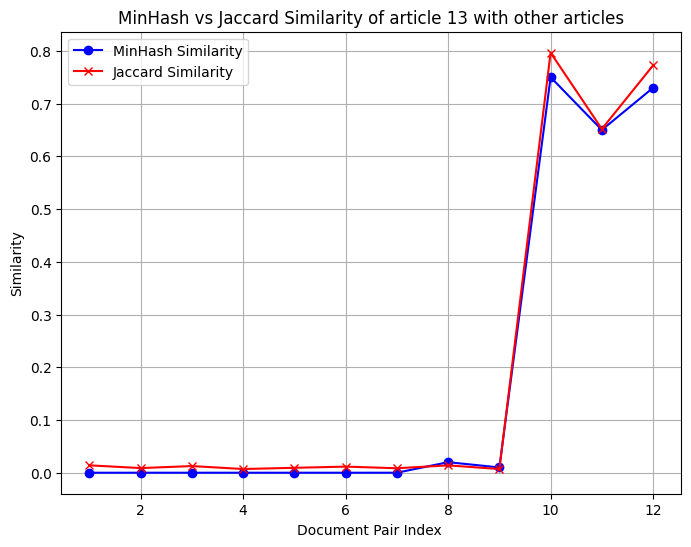

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(m_similarity) + 1), m_similarity, label="MinHash Similarity", marker='o', linestyle='-', color='b')
plt.plot(range(1, len(j_similarity) + 1), j_similarity, label="Jaccard Similarity", marker='x', linestyle='-', color='r')
plt.title("MinHash vs Jaccard Similarity of article 13 with other articles")
plt.xlabel("Document Pair Index ")
plt.ylabel("Similarity")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [10]:
# lsh
lsh = cs.LSH(num_bands, rows_per_band)
candidate_pairs = lsh.find_candidate_pairs(signatures)

In [11]:

# test
print("Candidate pairs:")

for pair in candidate_pairs:
    doc1, doc2 = pair
    jaccard_sim = cs.CompareSets.jaccard_similarity(set(shingles_list[doc1]), set(shingles_list[doc2]))
    if jaccard_sim >= similarity_threshold:
        print(f"Documents {doc1} and {doc2} are similar with Jaccard similarity {jaccard_sim:.2f}")

Candidate pairs:
Documents 9 and 10 are similar with Jaccard similarity 0.79
Documents 10 and 11 are similar with Jaccard similarity 0.77
Documents 9 and 12 are similar with Jaccard similarity 0.80
Documents 11 and 12 are similar with Jaccard similarity 0.77
Documents 9 and 11 are similar with Jaccard similarity 0.97
Documents 10 and 12 are similar with Jaccard similarity 0.65


In [12]:
def test_scalability(documents, k, num_permutations, num_bands, rows_per_band, similarity_threshold):
    dataset_sizes = list(range(1, 13))
    execution_times = []

    for size in dataset_sizes:
        start_time = time.time()
        # Select subset of documents to test scalability
        subset_documents = documents[:size]

        # Shingling and generate vocabulary
        shingler = cs.Shingling(k)
        shingles_list = [shingler.shingle(doc) for doc in subset_documents]
        vocas = shingler.vocas_from_documents(*subset_documents)

        # Generate signature
        minhashing = cs.MinHashing(num_permutations, vocas)
        signatures = {i: minhashing.compute_minhash_signature(shingles) for i, shingles in enumerate(shingles_list)}

        # LSH
        lsh = cs.LSH(num_bands, rows_per_band)

        # Start measuring execution time
        candidate_pairs = lsh.find_candidate_pairs(signatures)
        end_time = time.time()

        # Record execution time
        execution_times.append(end_time - start_time)

        # Optional: Print the result for a specific dataset size
        print(f"Dataset size: {size} | Execution time: {execution_times[-1]:.4f} seconds")

    return dataset_sizes, execution_times

In [ ]:
dataset_sizes, execution_times = test_scalability(documents, k, num_permutations, num_bands, rows_per_band, similarity_threshold)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(dataset_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.title("Scalability Test: Execution Time vs Dataset Size")
plt.xlabel("Number of Documents")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

Dataset size: 1 | Execution time: 0.0772 seconds
Dataset size: 2 | Execution time: 0.5469 seconds
Dataset size: 3 | Execution time: 2.1057 seconds
Dataset size: 4 | Execution time: 4.4544 seconds
Dataset size: 5 | Execution time: 8.7797 seconds
Dataset size: 6 | Execution time: 13.5164 seconds
Dataset size: 7 | Execution time: 13.0935 seconds
Dataset size: 8 | Execution time: 15.7747 seconds
Dataset size: 9 | Execution time: 18.3420 seconds
